In [1]:
import pandas as pd

In [2]:
from src.qtrade.mysql_util import *

In [3]:
with get_connection() as cursor:
    sql = f'''
    select code, date, close, lag(close, 1) over(partition by code order by date)
    from etf.ods_etf_history
    order by code, date
    '''
    cursor.execute(sql)
    data = cursor.fetchall()

In [4]:
df = pd.DataFrame(data, columns=['code', 'date', 'close', 'close_1'])

In [6]:
df.tail()

,code,date,close,close_1
757315,588900,2024-05-27,0.788,0.779
757316,588900,2024-05-28,0.782,0.788
757317,588900,2024-05-29,0.779,0.782
757318,588900,2024-05-30,0.785,0.779
757319,588900,2024-05-31,0.790,0.785


In [7]:
df.shape

(757320, 4)

In [8]:
df.to_parquet("etf.parquet")

In [9]:
df = df.dropna()

In [11]:
df.head()

,code,date,close,close_1
1,159150,2023-12-12,1.004,1.000
2,159150,2023-12-13,0.986,1.004
3,159150,2023-12-14,0.979,0.986
4,159150,2023-12-15,0.979,0.979
5,159150,2023-12-18,0.970,0.979


In [13]:
df["increase_rate"] = df["close"]/df["close_1"]-1

In [14]:
df.tail()

,code,date,close,close_1,increase_rate
757315,588900,2024-05-27,0.788,0.779,0.011553
757316,588900,2024-05-28,0.782,0.788,-0.007614
757317,588900,2024-05-29,0.779,0.782,-0.003836
757318,588900,2024-05-30,0.785,0.779,0.007702
757319,588900,2024-05-31,0.790,0.785,0.006369


In [80]:
df1 = df[df.code=="159941"]
df1["increase_rate"].describe()
score = [1-0.05*ele for ele in range(20, 0, -1)]
df1["increase_rate"] = df1["increase_rate"]*100
res = df1["increase_rate"].quantile(score)
df1.index = range(len(df1))
print(res)

0.00   -1.000637e+01
0.05   -2.224695e+00
0.10   -1.444821e+00
0.15   -1.067262e+00
0.20   -8.020067e-01
0.25   -5.741620e-01
0.30   -3.959637e-01
0.35   -2.604870e-01
0.40   -1.172316e-01
0.45   -7.991683e-08
0.50    1.057104e-01
0.55    2.187908e-01
0.60    3.390679e-01
0.65    4.798501e-01
0.70    6.137619e-01
0.75    7.649311e-01
0.80    9.640109e-01
0.85    1.236700e+00
0.90    1.545796e+00
0.95    2.276626e+00
Name: increase_rate, dtype: float64


C:\Users\xiaolei.zuo\AppData\Local\Temp\ipykernel_22632\2918082854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["increase_rate"] = df1["increase_rate"]*100


In [86]:
score[2]

0.09999999999999998

In [81]:
threshold = -1.545796
result = []
for ele in range(len(df1)):
    increase_rate = df1.loc[ele, 'increase_rate']
    date = df1.loc[ele, 'date']
    if increase_rate<threshold:
        next_increase_rate = df1.loc[ele+1, 'increase_rate']
        result.append([date, next_increase_rate])
print(sum([ele[1] for ele in result]))
print(sum([ele[1] for ele in result])/len(result))

59.123297679699256
0.30319639835743206


In [59]:
len(result)

68.29898393410211
0.2492663647230004


68.29898393410211
0.2492663647230004


In [48]:
pd.DataFrame(result).tail(10)

,0,1
264,2022-08-02,-0.651466
265,2022-09-16,-0.331130
266,2022-10-10,0.231218
267,2022-10-24,0.116148
268,2022-10-28,-0.237252
269,2022-12-19,-1.001110
270,2023-04-21,-0.411947
271,2023-08-11,-0.311207
272,2023-10-19,-0.763360
273,2024-01-22,0.470588


In [36]:
pd.DataFrame(result)[1].sum()

-0.6517814597739435

In [37]:
pd.DataFrame(result).shape

(158, 2)

In [90]:
df["increase_rate"] = df["increase_rate"]*100

In [96]:
df1 =df[df.code=='159636']

In [97]:
df1

,code,date,close,close_1,increase_rate
23158,159636,2022-07-21,0.977,0.977,1.952250e-07
23159,159636,2022-07-22,0.973,0.977,-4.094164e-01
23160,159636,2022-07-25,0.952,0.973,-2.158272e+00
23161,159636,2022-07-26,0.972,0.952,2.100838e+00
23162,159636,2022-07-27,0.955,0.972,-1.748971e+00
...,...,...,...,...,...
23604,159636,2024-05-27,0.830,0.817,1.591191e+00
23605,159636,2024-05-28,0.826,0.830,-4.819257e-01
23606,159636,2024-05-29,0.807,0.826,-2.300239e+00
23607,159636,2024-05-30,0.803,0.807,-4.956607e-01


In [98]:
df2 = df1[df1.increase_rate<=-2.57966935249365]

In [99]:
df2.shape

(43, 5)

In [101]:
df2.tail(10)

,code,date,close,close_1,increase_rate
23532,159636,2024-01-31,0.582,0.604,-3.642380
23534,159636,2024-02-02,0.579,0.597,-3.015076
23537,159636,2024-02-07,0.610,0.628,-2.866245
23550,159636,2024-03-05,0.669,0.693,-3.463206
23552,159636,2024-03-07,0.663,0.683,-2.928262
23563,159636,2024-03-22,0.699,0.719,-2.781639
23578,159636,2024-04-16,0.696,0.720,-3.333337
23581,159636,2024-04-19,0.684,0.703,-2.702704
23600,159636,2024-05-21,0.842,0.869,-3.107022
23603,159636,2024-05-24,0.817,0.844,-3.199050


In [102]:
df2.head()

,code,date,close,close_1,increase_rate
23164,159636,2022-07-29,0.912,0.959,-4.900938
23166,159636,2022-08-02,0.884,0.918,-3.703702
23172,159636,2022-08-10,0.881,0.916,-3.820962
23176,159636,2022-08-16,0.889,0.916,-2.947599
23188,159636,2022-09-01,0.884,0.909,-2.750273


In [1]:
import pandas as pd
from tqdm import tqdm

df = pd.read_parquet("etf.parquet")
df["increase_rate"] = df["close"]/df["close_1"]-1
df["increase_rate"] = df["increase_rate"]*100

from src.qtrade.mysql_util import *

with get_connection() as cursor:
    sql = """
    select code
    from etf.dim_etf_scale
    where scale>=10
    limit 100
    """
    cursor.execute(sql)
    codes = [ele[0] for ele in cursor.fetchall()]

all_result = []
for code in tqdm(codes):
    df1 = df[df.code==code]
    df1["increase_rate"].describe()
    score = [1-0.05*ele for ele in range(20, 0, -1)]
    res = df1["increase_rate"].quantile(score)
    df1.index = range(len(df1))
    
    profit_array = []
    ele = 0.9
    threshold = -res[ele]
    result = []
    for ele in range(len(df1)-1):
        increase_rate = df1.loc[ele, 'increase_rate']
        date = df1.loc[ele, 'date']
        if increase_rate<=threshold:
            next_increase_rate = df1.loc[ele+1, 'increase_rate']
            result.append([date, next_increase_rate])
    if result:
        profit = sum([ele[1] for ele in result])
        avg_profit = sum([ele[1] for ele in result])/len(result)
    else:
        profit = avg_profit = 0
    profit_array.append([threshold, avg_profit])
    best_parameter = sorted(profit_array, key=lambda x:x[1], reverse=True)[0]
    all_result.append([code, *best_parameter])

all_result = pd.DataFrame(all_result, columns=['code', 'threshold', 'avg_profit'])
all_result = all_result[all_result.avg_profit>=0.2]


100%|██████████| 100/100 [00:06<00:00, 16.17it/s]


In [7]:
all_result = all_result.sort_values(by="avg_profit", ascending=False)

In [8]:
threshold_dict = dict(all_result[['code', 'threshold']].values.tolist())

In [9]:
threshold_dict

{'159636': -2.579669352493652,
 '159869': -2.7225752039461835,
 '159150': -1.5557456401050913,
 '159632': -1.6314725320989876,
 '159573': -2.51556445268103,
 '159993': -1.7687548764421643,
 '159638': -1.8967462283996255,
 '159605': -2.9366036121074894,
 '159607': -2.9982293775920144,
 '159997': -2.197629676753991,
 '159941': -1.5457963466834856,
 '510380': -1.540121355089528,
 '159513': -1.4113185188465383,
 '510150': -1.9201621283647177,
 '159908': -2.248009619731861,
 '159637': -2.0599140825039646,
 '159952': -2.0441701478789653,
 '510210': -1.5930213290095772,
 '159948': -1.9055861606947389,
 '159536': -2.099967039232791,
 '159806': -2.8037406129721445}

In [5]:
df.head()

,code,date,close,close_1,increase_rate
0,159150,2023-12-11,1.000,NaN,NaN
1,159150,2023-12-12,1.004,1.000,0.400000
2,159150,2023-12-13,0.986,1.004,-1.792824
3,159150,2023-12-14,0.979,0.986,-0.709939
4,159150,2023-12-15,0.979,0.979,0.000003


In [22]:
df4 = df.loc[df.date>='2023-05-31']

In [23]:
df.loc[(df.date=='2023-12-15')&(df.code=='159150'), 'increase_rate'].tolist()[0]

2.8249801831137233e-06

In [26]:
from tqdm import tqdm

In [36]:
dates = df4.date.unique().tolist()
dates = sorted(dates)
results = []
profit = 1
for num, date in tqdm(enumerate(dates[:-2])):
    select_df = df4[df4.date==date]
    increase_rate_dict = dict(select_df[["code", "increase_rate"]].values.tolist())
    for key in threshold_dict:
        if key in increase_rate_dict:
            increase_rate = increase_rate_dict[key]
            threshold = threshold_dict[key]
            if increase_rate<threshold:
                next_increase_rate = df4.loc[(df4.date==dates[num+1])&(df4.code==key), 'increase_rate'].tolist()[0]
                profit = profit*(1+next_increase_rate/100)
                results.append([key, profit])
                break

0it [00:00, ?it/s]

241it [00:03, 61.32it/s]


In [37]:
results

[['159636', 1.0166880821543307],
 ['159869', 1.0126375038111124],
 ['159632', 1.0272759719611766],
 ['159636', 1.0210197485608363],
 ['159869', 1.0330651000451228],
 ['159869', 1.0391599203235065],
 ['159869', 1.0635152547275069],
 ['159869', 1.0643777629365891],
 ['159632', 1.0652054173229886],
 ['159869', 1.0508953664062992],
 ['159941', 1.05962166904305],
 ['159869', 1.0729558060131696],
 ['159993', 1.0630759519042237],
 ['510380', 1.065070481130766],
 ['159869', 1.0350186630588754],
 ['159869', 1.0526961773590122],
 ['159636', 1.036326468631629],
 ['159993', 1.0522852630211943],
 ['159993', 1.0655024069673347],
 ['159869', 1.0914434352613755],
 ['159993', 1.0684876420953076],
 ['159993', 1.0757917057388293],
 ['159997', 1.0804792715020226],
 ['159869', 1.1042478743369033],
 ['159638', 1.1055863725841197],
 ['159941', 1.1042826281091653],
 ['159632', 1.0928711083289175],
 ['159605', 1.0770532505393942],
 ['159997', 1.0794126370491248],
 ['510380', 1.0706724801067813],
 ['159869', 1.

In [40]:
len(results[-1])

2

In [1]:
import pandas as pd
from tqdm import tqdm

df = pd.read_parquet("etf.parquet")

In [2]:
df1 = df[df.code=='510210']

In [3]:
df1.shape

(3154, 4)

In [4]:
df1.head()

,code,date,close,close_1
328797,510210,2011-03-25,2.965,NaN
328798,510210,2011-03-28,2.965,2.965
328799,510210,2011-03-29,2.936,2.965
328800,510210,2011-03-30,2.940,2.936
328801,510210,2011-03-31,2.918,2.940


In [5]:
import seaborn as sns

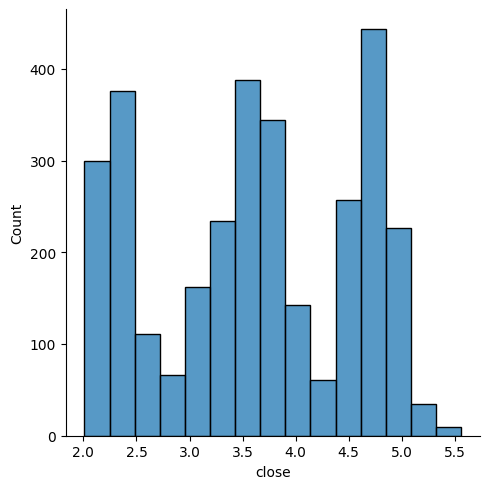

In [7]:
sns.displot(df1['close'], kind="hist")

In [8]:
df1.close.mean()

3.6117289156626504